In [1]:
!pip install transformers
import transformers
print(transformers.__version__)

4.47.1


In [2]:
#importing all libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#Loading dataset

In [5]:
# Step 1: Load the dataset 
df = pd.read_csv('train_product_data.csv')

In [6]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [7]:
#keeping only the relevant columns which are descripton and product_category_tree
df = df[['description','product_category_tree']]

In [8]:
df.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [9]:
#saving the filtered dataset 
#specifying the file path where you want to save the file
import os
file_path = os.path.join(r"C:\Users\ASUS\Desktop\Ecommerce_Product_Categorization\Data","original_filtered_data.csv")

#Save the df dataframe as a CSV file
df.to_csv(file_path, index=False) #set index=False to avoid saving the Dataframe index

In [10]:
df.shape

(14999, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            14998 non-null  object
 1   product_category_tree  14999 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [12]:
#checking total number of duplicates
df.duplicated().sum() 

1832

In [13]:
#checking for missing values
df.isna().sum()/len(df) * 100


description              0.006667
product_category_tree    0.000000
dtype: float64

In [14]:
#imputing the missing values in the description column with it's mode
df['description'].fillna(df['description'].mode()[0], inplace=True)

In [15]:
#checking missing values
df.isna().sum()/len(df) * 100

description              0.0
product_category_tree    0.0
dtype: float64

In [16]:
#checking the class distribution of the target variable
df['product_category_tree'].value_counts()

product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64

In [17]:
#Plotting the target class distribution

In [18]:
#Define a folder to save visualizations
Visuals_folder = r"C:\Users\ASUS\Desktop\Ecommerce_Product_Categorization\Visuals"

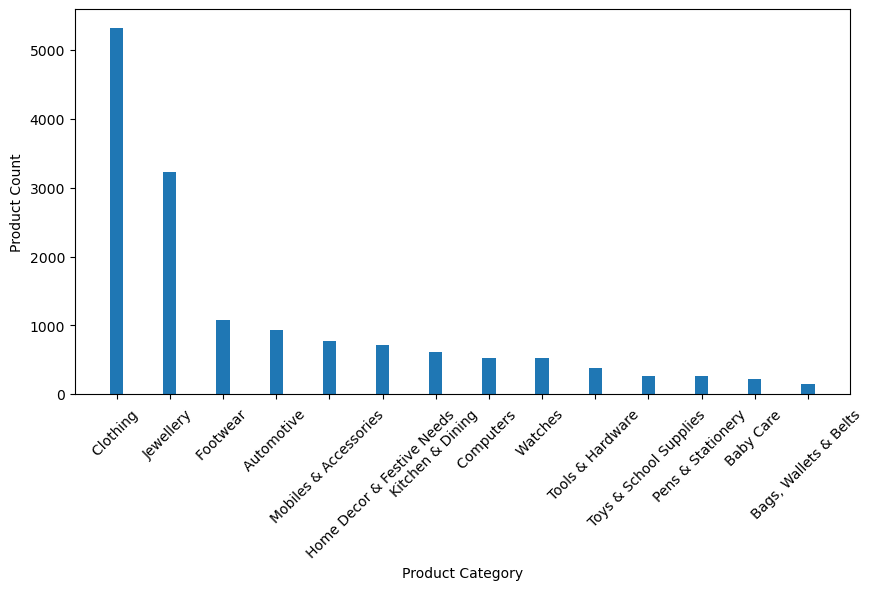

In [19]:
import matplotlib.pyplot as plt
#check for the target class counts
label_dist = df['product_category_tree'].value_counts().to_dict()
fig = plt.figure(figsize = (10,5))
ax = plt.bar(label_dist.keys(), label_dist.values(), width = 0.25)
plt.xticks(rotation = 45)
plt.xlabel("Product Category")
plt.ylabel("Product Count")

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "initial_product_category_distribution.png"))
plt.show()

In [20]:
from imblearn.over_sampling import RandomOverSampler
#separate features and target 
X = df[['description']]
y = df['product_category_tree']

#Initialize RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy ='auto')

#Apply Random Oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

#Combine the resampled features and target back into a single dataframe
df_resampled =X_resampled.copy()
df_resampled['product_category_tree'] = y_resampled

#Verify the new class distribution
print(df_resampled['product_category_tree'].value_counts())


product_category_tree
Clothing                       5316
Footwear                       5316
Pens & Stationery              5316
Bags, Wallets & Belts          5316
Home Decor & Festive Needs     5316
Automotive                     5316
Tools & Hardware               5316
Baby Care                      5316
Mobiles & Accessories          5316
Watches                        5316
Toys & School Supplies         5316
Jewellery                      5316
Kitchen & Dining               5316
Computers                      5316
Name: count, dtype: int64


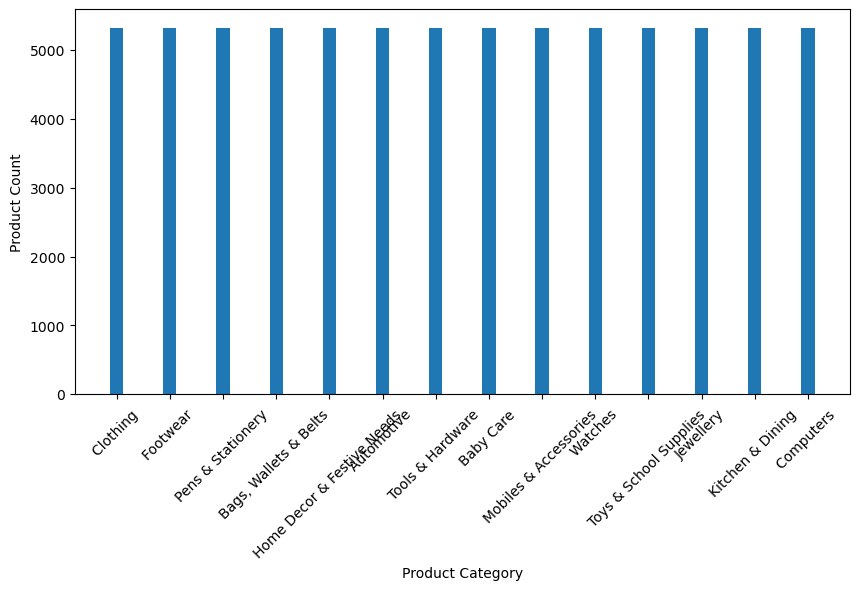

In [21]:
#plotting the target class distribution after oversampling

#check for the target class counts

label_dist = df_resampled['product_category_tree'].value_counts().to_dict()
fig = plt.figure(figsize = (10,5))
ax = plt.bar(label_dist.keys(), label_dist.values(), width =0.25)
plt.xticks(rotation = 45)
plt.xlabel("Product Category")
plt.ylabel("Product Count")
#Save the figure automatically
plt.savefig(os.path.join(Visuals_folder, "resampled_product_category_distribution.png"))
plt.show()

In [22]:
#Now the target variable is well balanced and we can proced ahead
#checking the shape of df_resampled
df_resampled.shape

(74424, 2)

In [23]:
#Looking at the information of  df_resampled using info()
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74424 entries, 0 to 74423
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            74424 non-null  object
 1   product_category_tree  74424 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [24]:
df_resampled.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [25]:
#saving the resampled dataset 
#specifying the file path where you want to save the file

file_path = os.path.join(r"C:\Users\ASUS\Desktop\Ecommerce_Product_Categorization\Data\Processed_Data","resampled_data.csv")

#Save the df dataframe as a CSV file
df.to_csv(file_path, index=False) #set index=False to avoid saving the Dataframe index

In [26]:
df_resampled.isna().sum()/len(df_resampled) * 100

description              0.0
product_category_tree    0.0
dtype: float64

In [27]:
#convert all values in 'description' column to string type
df_resampled['desciption'] = df_resampled['description'].astype(str)

In [28]:
df_resampled.dtypes

description              object
product_category_tree    object
desciption               object
dtype: object

In [29]:
#checking the total duplicates after resampling
df_resampled.duplicated().sum()

61257

In [30]:
#Looking at the information of df_resampled using info()
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74424 entries, 0 to 74423
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   description            74424 non-null  object
 1   product_category_tree  74424 non-null  object
 2   desciption             74424 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [31]:
#add a new column for the length of the reviews
df_resampled['length'] = df_resampled['description'].apply(lambda x: len(x.split(' ')))

In [32]:
df_resampled.head()

,description,product_category_tree,desciption,length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",64


In [33]:
#checking the names of different categories
df_resampled['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [34]:
#creating a datframe to store the mean length of each category
results = []
for x in df_resampled['product_category_tree'].unique():
    mean_length = round(df_resampled[df_resampled['product_category_tree']==x]['length'].mean())
    results.append({'Category': x, 'MeanLength': mean_length})
mean_length_df = pd.DataFrame(results)

In [35]:
#checking the mean_length_df dataframe
mean_length_df

,Category,MeanLength
0,Clothing,64
1,Footwear,54
2,Pens & Stationery,57
3,"Bags, Wallets & Belts",85
4,Home Decor & Festive Needs,105
5,Automotive,79
6,Tools & Hardware,57
7,Baby Care,75
8,Mobiles & Accessories,128
9,Watches,59


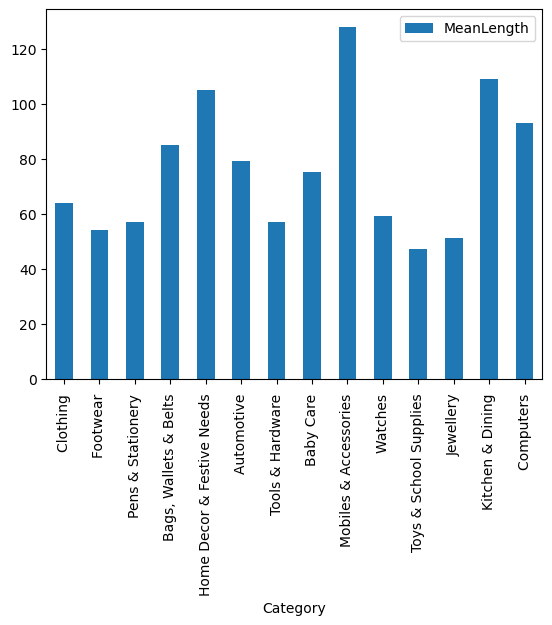

In [36]:
from tensorflow.keras.utils import to_categorical
#plotting mean length for each category
mean_length_df.plot(kind = 'bar', x = 'Category', y = 'MeanLength')

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "Mean Length of Description by Category.png"))
plt.show()

In [37]:
#We can see that the mean description lengths for most categories are in the range of 40-120

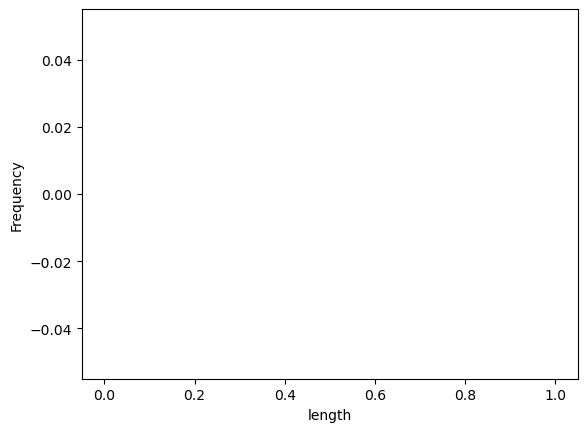

In [38]:
%matplotlib inline

#Plotting the distribution based on the length of the descriptions for each category
df_resampled[df_resampled['product_category_tree']=='Clothing']['length'].plot.hist(bins=10, alpha=0.3, label="Clothing")
df_resampled[df_resampled['product_category_tree']=='Footwear']['length'].plot.hist(bins=10, alpha=0.3, label="Footwear")
df_resampled[df_resampled['product_category_tree']=='Pens E& Stationary ']['length'].plot.hist(bins=10, alpha=0.3, label="Pens & Stationary")
df_resampled[df_resampled['product_category_tree']=='Bags, Wallets & Belts']['length'].plot.hist(bins=10, alpha=0.3, label="Bags, Wallets & Belts")
df_resampled[df_resampled['product_category_tree']=='Home Decor & Festive Needs']['length'].plot.hist(bins=10, alpha=0.3, label="Home Decor & Festive Needs")
df_resampled[df_resampled['product_category_tree']=='Automotive']['length'].plot.hist(bins=10, alpha=0.3, label="Automotive")
df_resampled[df_resampled['product_category_tree']=='Tools & Hardware']['length'].plot.hist(bins=10, alpha=0.3, label="Tools & Hardware")
df_resampled[df_resampled['product_category_tree']=='Baby Care']['length'].plot.hist(bins=10, alpha=0.3, label="Baby Care")
df_resampled[df_resampled['product_category_tree']=='Mobiles & Accessories']['length'].plot.hist(bins=10, alpha=0.3, label="Mobiles & Accessories")
df_resampled[df_resampled['product_category_tree']=='Watches']['length'].plot.hist(bins=10, alpha=0.3, label="Watches")
df_resampled[df_resampled['product_category_tree']=='Toys & School Supplies']['length'].plot.hist(bins=10, alpha=0.3, label="Toys & School Supplies")
df_resampled[df_resampled['product_category_tree']=='Jewellery']['length'].plot.hist(bins=10, alpha=0.3, label="Jewellery")
df_resampled[df_resampled['product_category_tree']=='Kitchen & Dining']['length'].plot.hist(bins=10, alpha=0.3, label="Kitchen & Dining")
df_resampled[df_resampled['product_category_tree']=='Computers']['length'].plot.hist(bins=10, alpha=0.3, label="Computers")
plt.xlabel("length")

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "Initial_Description_Length_Distributtion.png"))
plt.show()


In [39]:
#We can see that most of the description lengths are in the range of 10-100

In [40]:
#getting the stopwords of the english language and storing it as a set
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [41]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [42]:
#removing stopwords from the descriptions and storing the cleaned description in a different column
df_resampled['clean_description'] = df_resampled['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [43]:
import re
#defining a function for content cleaning
def text_clean(content):
     #lowercasing
    content = content.lower()
     # Remove punctuation
    content = re.sub('[()!?]', ' ', content)
    content = re.sub('\[*?\]', " ", content)
    # Remove non alphanumeric occurences
    content = re.sub("[^a-z0-9]", " ", content) 
    #remove the @ mention
    content = re.sub("@[A-Za-z0-9_]+", "", content) 
    #remove the hashtags
    content = re.sub("#[A-Za-z0-9_]+", "", content) 
    # remove any links
    content = re.sub(r"http\S+", "", content) 
    content = re.sub(r"www.\S+", "", content)  
    return content

In [44]:
#apply the function on the clean_description column
df_resampled['clean_description'] = df_resampled['clean_description'].apply(text_clean)

In [45]:
#dropping the length column
df_resampled = df_resampled.drop('length', axis = 1)

In [46]:
#add back the length of the cleaned description after the cleaned descriptions column
df_resampled['length'] = df_resampled['clean_description'].apply(lambda x: len(x.split(' ')))

In [47]:
#checking change in length after cleaning
df_resampled.head()


,description,product_category_tree,desciption,clean_description,length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,66
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,key features aw bellies sandals wedges heel ca...,99
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,67
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",key features dilli bazaaar bellies corporate ...,78


In [48]:
from collections import OrderedDict
#functions to remove duplicate words while preserving order
def remove_duplicate_words(text):
    words = text.split()  #split the text into words
    unique_words = list(OrderedDict.fromkeys(words)) #use OrderDict to maintain order
    return ' '.join(unique_words)  #join the list back into a string


In [49]:
#apply the function to the cleaned produc descriptions
df_resampled['clean_description'] = df_resampled['clean_description'].apply(remove_duplicate_words)

In [50]:
#update the length of the descriptions after removing duplicate words
df_resampled['length']= df_resampled['clean_description'].apply(lambda x: len(x.split(' ')))

In [51]:
df_resampled.head()

,description,product_category_tree,desciption,clean_description,length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,43
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,key features aw bellies sandals wedges heel ca...,73
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,42
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,43
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",key features dilli bazaaar bellies corporate c...,38


In [52]:
#saving the feature engineered dataset
#specify the file path where you want to save the file

file_path = os.path.join(r"C:\Users\ASUS\Desktop\Ecommerce_Product_Categorization\Data\Processed_Data","featured_engineered_data.csv")


#save the df dataframe as a csv file
df_resampled.to_csv(file_path, index=False)  #set index=False to avoid saving the DataFrame index

In [53]:
#creating a dataframe to store the mean length of each category
results = []
for x in df_resampled['product_category_tree'].unique():
    mean_length = round(df_resampled [df_resampled['product_category_tree']==x]['length'].mean())
    results.append({'Category': x, 'MeanLength':mean_length})

mean_length_df = pd.DataFrame(results)

In [54]:
mean_length_df

,Category,MeanLength
0,Clothing,32
1,Footwear,31
2,Pens & Stationery,36
3,"Bags, Wallets & Belts",49
4,Home Decor & Festive Needs,44
5,Automotive,41
6,Tools & Hardware,28
7,Baby Care,43
8,Mobiles & Accessories,49
9,Watches,35


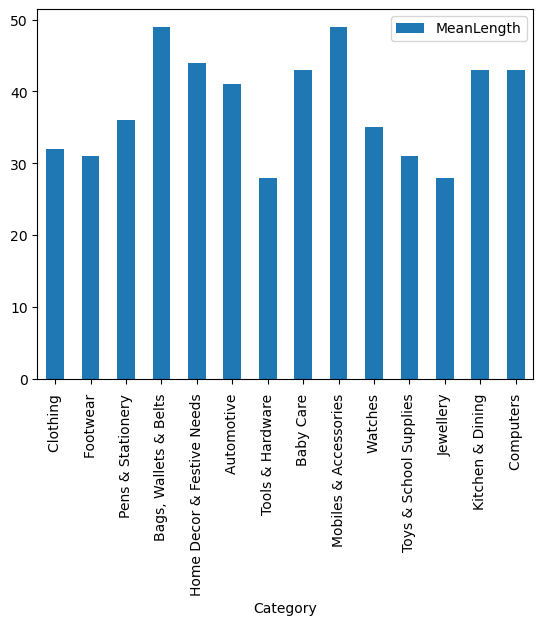

In [55]:
mean_length_df.plot(kind = 'bar', x = 'Category', y = 'MeanLength')
#save the figure automatically
plt.savefig(os.path.join(Visuals_folder, "Final Mean Length of Description by Category.png"))
plt.show()


In [56]:
#After cleaning, the mean lengths of product descriptions have reduced to a great extent and are now in a range of 30-40 compared to 120

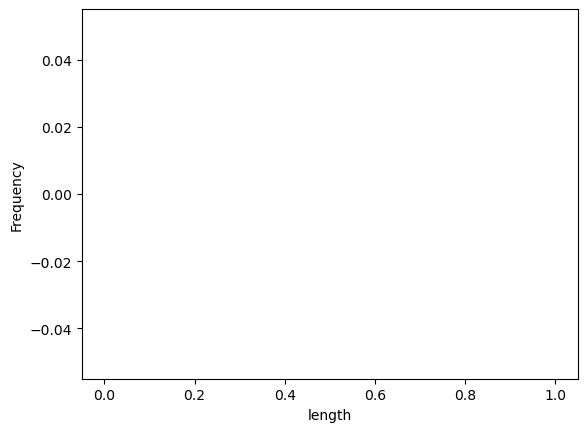

In [57]:
#Plotting the distribution based on the length of the descriptions for each category
df_resampled[df_resampled['product_category_tree']=='Clothing']['length'].plot.hist(bins=10, alpha=0.3, label="Clothing")
df_resampled[df_resampled['product_category_tree']=='Footwear']['length'].plot.hist(bins=10, alpha=0.3, label="Footwear")
df_resampled[df_resampled['product_category_tree']=='Pens E& Stationary ']['length'].plot.hist(bins=10, alpha=0.3, label="Pens & Stationary")
df_resampled[df_resampled['product_category_tree']=='Bags, Wallets & Belts']['length'].plot.hist(bins=10, alpha=0.3, label="Bags, Wallets & Belts")
df_resampled[df_resampled['product_category_tree']=='Home Decor & Festive Needs']['length'].plot.hist(bins=10, alpha=0.3, label="Home Decor & Festive Needs")
df_resampled[df_resampled['product_category_tree']=='Automotive']['length'].plot.hist(bins=10, alpha=0.3, label="Automotive")
df_resampled[df_resampled['product_category_tree']=='Tools & Hardware']['length'].plot.hist(bins=10, alpha=0.3, label="Tools & Hardware")
df_resampled[df_resampled['product_category_tree']=='Baby Care']['length'].plot.hist(bins=10, alpha=0.3, label="Baby Care")
df_resampled[df_resampled['product_category_tree']=='Mobiles & Accessories']['length'].plot.hist(bins=10, alpha=0.3, label="Mobiles & Accessories")
df_resampled[df_resampled['product_category_tree']=='Watches']['length'].plot.hist(bins=10, alpha=0.3, label="Watches")
df_resampled[df_resampled['product_category_tree']=='Toys & School Supplies']['length'].plot.hist(bins=10, alpha=0.3, label="Toys & School Supplies")
df_resampled[df_resampled['product_category_tree']=='Jewellery']['length'].plot.hist(bins=10, alpha=0.3, label="Jewellery")
df_resampled[df_resampled['product_category_tree']=='Kitchen & Dining']['length'].plot.hist(bins=10, alpha=0.3, label="Kitchen & Dining")
df_resampled[df_resampled['product_category_tree']=='Computers']['length'].plot.hist(bins=10, alpha=0.3, label="Computers")
plt.xlabel("length")

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "Final_Description_Length_Distributtion.png"))
plt.show()


In [58]:
#After cleaning we can see that most of the description lengths are in the range 10-40

In [59]:
df_resampled.head()

,description,product_category_tree,desciption,clean_description,length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,43
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,key features aw bellies sandals wedges heel ca...,73
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,42
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,43
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",key features dilli bazaaar bellies corporate c...,38


In [60]:
df_resampled['product_category_tree'].shape

(74424,)

In [61]:
#Performing Train Test Split

In [62]:
#sentiment classifier
#split the data into training and test set wth balanced split based on target class
X_train, X_test,y_train,y_test = train_test_split(df_resampled["clean_description"],df_resampled["product_category_tree"], test_size =0.2, stratify=df_resampled['product_category_tree'])

In [63]:
#check the class balance in the training data
print(y_train.value_counts())

product_category_tree
Watches                        4253
Bags, Wallets & Belts          4253
Home Decor & Festive Needs     4253
Clothing                       4253
Tools & Hardware               4253
Pens & Stationery              4253
Computers                      4253
Footwear                       4253
Automotive                     4253
Jewellery                      4253
Baby Care                      4253
Mobiles & Accessories          4252
Toys & School Supplies         4252
Kitchen & Dining               4252
Name: count, dtype: int64


In [64]:
#there is no class imbalance

In [65]:
#check the target class balance in the test data
print(y_test.value_counts())

product_category_tree
Kitchen & Dining               1064
Toys & School Supplies         1064
Mobiles & Accessories          1064
Baby Care                      1063
Jewellery                      1063
Footwear                       1063
Tools & Hardware               1063
Bags, Wallets & Belts          1063
Computers                      1063
Automotive                     1063
Watches                        1063
Clothing                       1063
Pens & Stationery              1063
Home Decor & Festive Needs     1063
Name: count, dtype: int64


In [66]:
#checking X-train
X_train

72904    key features esidon akada11 analog watch for w...
24931    flipkart com buy kiara backpack rs 448 only ge...
52749    cazcase book cover apple ipad pro 12 9 black p...
39913    sukhson india gold plated decorative platter p...
67221    karta b bear with sharpner game art plastic pe...
                               ...                        
5196     diti enterprises showpiece 5 cm brass multicol...
22076    buy welhouse cotton hand face towel set rs 479...
6501     itzmyfashion alloy necklace buy rs 399 flipkar...
20466    the intellect bazaar cotton bath towel baby 1 ...
29501    flipkart com buy fifa 15 inch laptop backpack ...
Name: clean_description, Length: 59539, dtype: object

In [67]:
#Performing WordEmbedding using Word2Vec

In [68]:
import nltk 
from nltk.tokenize import word_tokenize
# Download the required NLTK data files
nltk.download('punkt')

#Tokenize the descriptions
train_sentences = [word_tokenize(description.lower()) for description in X_train]
test_sentences = [word_tokenize(description.lower()) for description in X_test]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
#checking train_sentences***
train_sentences

[['key',
  'features',
  'esidon',
  'akada11',
  'analog',
  'watch',
  'for',
  'women',
  'dial',
  'color',
  'white',
  'shape',
  'triangle',
  'strap',
  'gold',
  'specifications',
  'general',
  'type',
  'style',
  'code',
  'ideal',
  'occasion',
  'party',
  'wedding',
  'warranty',
  '3',
  'month',
  'body'],
 ['flipkart',
  'com',
  'buy',
  'kiara',
  'backpack',
  'rs',
  '448',
  'only',
  'genuine',
  'products',
  '30',
  'day',
  'replacement',
  'guarantee',
  'free',
  'shipping',
  'cash',
  'on',
  'delivery'],
 ['cazcase',
  'book',
  'cover',
  'apple',
  'ipad',
  'pro',
  '12',
  '9',
  'black',
  'price',
  'rs',
  '1',
  '699',
  'expensive',
  'gadgets',
  'like',
  'need',
  'handled',
  'utmost',
  'care',
  'avoid',
  'damage',
  'scratches',
  'hence',
  'keep',
  'perfect',
  'condition',
  'long',
  'period',
  'time',
  'however',
  'lack',
  'proper',
  'accessory',
  'times',
  'let',
  'carry',
  'use',
  'device',
  'hassle',
  'free',
  'mann

In [70]:
#checking for test sentences
test_sentences

[['buy',
  'triston',
  'home',
  'wheel',
  'pizza',
  'cutter',
  'rs',
  '399',
  'online',
  'best',
  'prices',
  'free',
  'shipping',
  'cash',
  'delivery',
  'only',
  'genuine',
  'products',
  '30',
  'day',
  'replacement',
  'guarantee'],
 ['specifications',
  'next',
  'steps',
  'baby',
  'girl',
  's',
  'printed',
  'top',
  'pyjama',
  'set',
  'general',
  'details',
  'pattern',
  'ideal',
  'for',
  'night',
  'suit',
  'number',
  'contents',
  'sales',
  'package',
  'pack',
  '1',
  'fabric',
  'cotton',
  'type',
  'neck',
  'round',
  'in',
  'box'],
 ['voylla',
  'artificial',
  'beaded',
  'textured',
  'yellow',
  'gold',
  'plated',
  'alloy',
  'necklace',
  'buy',
  'rs',
  '359',
  'flipkart',
  'com',
  'only',
  'genuine',
  'products',
  '30',
  'day',
  'replacement',
  'guarantee',
  'free',
  'shipping',
  'cash',
  'on',
  'delivery'],
 ['flipkart',
  'com',
  'buy',
  'stellar',
  'collections',
  'slippers',
  'rs',
  '249',
  'only',
  'genuin

In [71]:
!pip install --upgrade scipy

In [ ]:
!pip uninstall scipy
!pip install scipy

In [ ]:
import gensim 
from gensim.models import Word2Vec 
from nltk.tokenize import word_tokenize
import numpy as np 
from scipy.linalg import triu

#initialize and train wordzvec model
word2vec_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)
#'sg=1' for skip-gram model, 'sg=0' for CBOW

In [ ]:
word2vec_model

In [ ]:
#function to compute the average WordVec vector for a given description
def get_average_word2vec(sentence, model, vector_size):
    words = [word for word in sentence if word in model.wv.ket_to_index]
    if len(words) == 0:
        return np.zeros(vector_size)
    return np.mean([model.wv[word] for word in words], axis=0)

#Apply the function to each tokenized sentence in the lists
train_vectors = [get_average_word2vec(sentence, word2vec_model, vector_size=100) for sentence in train_sentences]
test_vectors = [get_average_word2vec(sentence, word2vec_model, vector_size=100) for sentence in test_sentences]

In [ ]:
#checking train_vectors***
train_vectors

In [ ]:
#Model training and evaluation using various models

In [ ]:
#Creating the score-card and defining a function to update it with important performance metrics

In [ ]:
#create an empty dataframe to store the scores for various agorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score', 'Precision Score', 'Recall Score', 'f1 Score'])

#append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):
    #assign 'score_card' as global variable
    global score_card

    #append the results to the dataframe 'score_card'
    #ignore_index = True do not consider the index labels
    score_card = pd.concat([score_card, pd.DataFrame([{'model_name':model_name,
                                                       'Accuracy Score' : accuracy_score(y_test, y_pred),
                                                       'Precision Score' : precision_score(y_test, y_pred, average="weighted"),
                                                       'Recall Score' : recall_score(y_test, y_pred, average="weighted"),
                                                       'f1 Score' : f1_score(y_test, y_pred, average="weighted")}])],
                                                        ignore_index = True)

In [ ]:
#convert to numpy arrays
X_train_vectors = np.array(train_vectors)
X_test_vectors = np.array(test_vectors)

In [ ]:
X_test_vectors

In [ ]:
#RANDOM FOREST CLASSIFIER

In [ ]:
#train RndomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectors, y_train)

#Make predictions
y_pred_rf = rf_classifier.predict(X_test_vectors)

In [ ]:
#ACCURACY

In [ ]:
#Using accuracy_score() we are checking the accuracy on the testing dataset
accuracy_score(y_test, y_pred_rf)

In [ ]:
#Confusion Matrix

In [ ]:
#compute the confusion matrix
cmlr = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)

#Create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmlr, display_labels=rf_classifier.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "RF_Confusion_Matrix.png"))
plt.show()

In [ ]:
#CLASSIFICATION REPORT & F1 SCORE

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
#checking predicted labels
y_pred_rf

In [ ]:
#Checking training accuracy by fitting on the train data
y_predt = rf_classifier.predict(X_train_vectors)

accuracy = accuracy_score(y_train, y_predt)
print("Accuracy:", accuracy)

In [ ]:
#CROSS VALIDATION SCORES

In [ ]:
scores = cross_val_score(rf_classifier, X_train_vectors, y_train, cv=5, scoring='accuracy')  #S-fold cross validation

In [ ]:
scores

In [ ]:
#INTERPRETATION
#high scores - all scores are very close to 1,0, indicating that this model is consistently predicting nearly all the instances correctly across different  subsets of the data.

In [ ]:
#calling the update score card method to update the score card with this model's score
update_score_card(y_test, y_pred_rf, 'RFC_model')

In [ ]:
#Since this model is already yielding an accuracy of 100% and F1 Score of 100, there is no need to perform hyperparameter tuning for this model.

In [ ]:
#TESTING ON UPGRAD'S TEST DATA

In [ ]:
#Loading upgrad's final test data using pandas's read_csv()
ugt = pd.read_csv("C:\Users\ASUS\Desktop\Ecommerce_Product_Categorization\Data\Raw_Data\test_data.csv")

In [ ]:
ugt.head()

In [ ]:
#keeping only essental columns,i.e description and product_category_tree
ugt = ugt[['description']]

In [ ]:
ugt.head()

In [ ]:
ugt.info()

In [ ]:
#checking for missing values
ugt.isna().sum()/ len(df) * 100

In [ ]:
#add a new column for the length of reviews
ugt['length']=ugt['description'].apply(lambda x: len(x.split(' ')))

In [ ]:
ugt.head()

In [ ]:
#removing stopwords from the descriptions and storing the cleaned description in a different column
ugt['clean_description'] = ugt['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))

In [ ]:
#apply the function on the clean_description column
ugt['clean_description'] = ugt['clean_description'].apply(text_clean)

In [ ]:
#dropping the length column
ugt = ugt.drop('length', axis = 1)

In [ ]:
#add back the length of the cleaned description after the cleaned descriptions column
ugt['length'] = ugt['clean_description'].apply(lambda x: len(x.split(' ')))


In [ ]:
ugt.head()

In [ ]:
#apply the function to the cleaned produc descriptions
ugt['clean_description'] = ugt['clean_description'].apply(remove_duplicate_words)

In [ ]:
#update the length of the descriptions after removing duplicate words
ugt['length']= ugt['clean_description'].apply(lambda x: len(x.split(' ')))


In [ ]:
ugt['clean_description']

In [ ]:
ugt.head()

In [ ]:
ugt_sentences = [word_tokenize(description.lower()) for description in  ugt['clean_description']]

In [ ]:
ugt_sentences

In [ ]:
#initialize and train wordzvec model
word2vec_model = Word2Vec(sentences=ugt_sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [ ]:
word2vec_model


In [ ]:
ugt_vectors = [get_average_word2vec(sentence, word2vec_model, vector_size=100) for sentence in ugt_sentences]

In [ ]:
ugt_npyarray = np.array(ugt_vectors)

In [ ]:
ugt_npyarray

In [ ]:
#Make predictions using ugt_npyarray
ugtpredrf = rf_classifier.predict(ugt_npyarray)

In [ ]:
ugtpredrf.shape

In [ ]:
ugt_resarr

In [ ]:
accuracy_score(ugt_resarr, ugtpredrf)

In [ ]:
#CONFUSION MATRIX

In [ ]:
#compute the confusion matrix
cm = confusion_matrix(ugt_resarr, ugtpredrf, labels=rf_classifier.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "UGT_RF_Confusion_Matrix.png"))
plt.show()

In [ ]:
#CLASSIFICATION REPORT

In [ ]:
print("Classification Report:\n",classification_report(ugt_resarr, ugtpredrf))

In [ ]:
#SUPPORT VECTOR MACHINE CLASSIFIER MODEL(SVM)

In [ ]:
#Initializing the Support Vector Machine Classifier
SVC = LinearSVC()

#Fitting the model on the training data
SVC.fit(X_train_vectors, y_train)

#Obtaining the predictions on the test data
y_pred_svc = SVC.predict(X_test_vectors)

In [ ]:
#ACCURACY

In [ ]:
#checking accuracy
accuracy_score(y_test, y_pred_svc)

In [ ]:
#CONFUSION MATRIX

In [ ]:

#compute the confusion matrix
cmlr = confusion_matrix(y_test_labels, y_pred_svc, labels=SVC.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmlr, display_labels=SVC.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "SVC_Confusion_Matrix.png"))
plt.show()

In [ ]:
#CLASSIFICATION REPORT & F1 SCORE

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_svc))

In [ ]:
#Calling update score card method to update the score card with this model's score
update_score_card(y_test,y_pred_svc,'SVC_model')

In [ ]:
#HYPERPARAMETER TUNING (even though we got 0.96 there is a little scope of improvement)

In [ ]:
# Define the hyperparameter grid dictionary
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search_svc.fit(X_train_vectors, y_train)

# Print the best model and parameters
best_svc = grid_search_svc.best_estimator_
print(f"Best parameters: {grid_search_svc.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_svc.best_score_}")

In [ ]:
#checking best model
best_svc

In [ ]:
#fitting best model obtained on training data
best_svc.fit(X_train_vectors, y_train)

In [ ]:
#obtaining the predictions on test data
y_pred_bsvc = best_svc.predict(X_test_vectors)

In [ ]:
#Accuracy

In [ ]:
#using accuracy_score() on the testing dataset
accuracy.score(y_test, y_pred_bsvc)

In [ ]:
# CONFUSION MATRIX

In [ ]:

#compute the confusion matrix
cmbsvc = confusion_matrix(y_test, y_pred_bsvc, labels=best_svc.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmbsvc, display_labels=best_svc.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "Tuned_SVC_Confusion_Matrix.png"))
plt.show()

In [ ]:
#classification report & F1 Score
#evaluating performance of tuned SVC model on test data using classification report

In [ ]:
print(classification_report(y_pred_bsvc, y_test))

In [ ]:
CROSS VALIDATION SCORES

In [ ]:
scores = cross_val_score(best_svc, X_train_vectors, y_train, cv=5, scoring='accuracy')

In [ ]:
scores

In [ ]:
#Interpretation

In [ ]:
#calling the update score card method to update the score card with this model's score
update_score_card(y_test, y_pred_bsvc, 'BestTuned_SVC_model')

In [ ]:
#Testing on Upgrad's Test Data


In [ ]:
#making predictions using ugt_npyarray
ugtpredsvc = best_svc.predict(ugc_npyarray)

In [ ]:
ugtpredsvc

In [ ]:
ugt_resarr

In [ ]:
#Accuracy

In [ ]:
accuracy_score(ugt_resarr, ugtpredsvc)

In [ ]:
#Confusion Matrix

In [ ]:

#compute the confusion matrix
cm = confusion_matrix(ugt_resarr, ugtpredsvc, labels=best_svc.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmbsvc, display_labels=best_svc.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "UGT_SVC_Confusion_Matrix.png"))
plt.show()

In [ ]:
#CLASSIFICATION REPORT

In [ ]:
print("Classification Report:\n", classification_report(ugt_resarr, ugtpredsvc))

In [ ]:
#LOGISTIC REGRESSION MODEL

In [ ]:
#Initialize the Logistic Regression model 
lr = LogisticRegression(class_weight='balanced')
# fitting the model on training data 
lr.fit(X_train_vectors, y_train)
# Predict on the test set
y_pred_lr = lr.predict(X_test_vectors)


In [ ]:
#using accuracy_score() on the testing dataset
accuracy.score(y_test, y_pred_lr)

In [ ]:
#confusion Matrix

In [ ]:
#compute the confusion matrix
cmblr = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmblr, display_labels=lr.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "LR_Confusion_Matrix.png"))
plt.show()

In [ ]:
#CLASSIFICATION REPORT

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

In [ ]:
#calling the update score card method to update the score card with this model's score
update_score_card(y_test, y_pred_lr, 'LR_model')

In [ ]:
#HYPERPARAMETER TUNING

In [ ]:
# Define the hyperparameter grid dictionary
param_gridlr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear','newton-cg','saga']
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(lr, param_gridlr, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_searchlr.fit(X_train_vectors, y_train)

# Print the best model and parameters
best_lr = grid_searchlr.best_estimator_

In [ ]:
#checking the model
best_lr

In [ ]:
#fitting best model obtained on training data
best_lr.fit(X_train_vectors, y_train)

In [ ]:
#obtaining the predictions on test data
y_pred_lr = best_lr.predict(X_test_vectors)

In [ ]:
#Accuracy
accuracy_score(y_test, y_pred_blr)

In [ ]:
#Confusion Matrix

In [ ]:
#compute the confusion matrix
cmblr = confusion_matrix(y_test, y_pred_blr, labels=best_lr.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmblr, display_labels=best_lr.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "Tuned_LR_Confusion_Matrix.png"))
plt.show()

In [ ]:
#classificatio Report 

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred_blr))

In [ ]:
#Cross Validation Scores

In [ ]:
scores = cross_val_score(best_lr, X_train_vectors, y_train, cv=5, scoring='accuracy')

In [ ]:
scores

In [ ]:
#Interpretation

In [ ]:
#calling the update score card method to update the score card with this model's score
update_score_card(y_test, y_pred_blr, 'BestTuned_LR_model')

In [ ]:
#Testing on Upgrad's Test Data

In [ ]:
#making predictions using ugt_npyarray
ugtpredlr = best_lr.predict(ugc_npyarray)

In [ ]:
ugt_resarr

In [ ]:
#accuracy
accuracy_score(ugt_resarr, ugtpredlr)

In [ ]:
#Confusion Matrix

In [ ]:
#compute the confusion matrix
cm = confusion_matrix(ugt_resarr, ugtpredlr, labels=best_lr.classes_)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr.classes_)

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "UGT_LR_Confusion_Matrix.png"))
plt.show()

In [ ]:
#Classification Report

In [ ]:
print("Classification Report:\n", classification_report(ugt_resarr, ugtpredlr))

In [ ]:
#Deep Learning Approach(Long Short Term Memory(LSTM) Model)

In [ ]:
#Tokenize the texts
texts = df_resampled["clean_description"].values
labels = df_resampled["product_category_tree"].values

In [ ]:
#convert labels to numeric format
unique_labels = list(set(labels))
label_mapping = (label: idx for idx, label in enumerate(unique_labels))
numeric_labels = np.array(labels)  #no need to map them

In [ ]:
#check for unexpected values in labels
print("Unique labels in dataset:", set(labels))
print("Label mapping dictionary:", label_mapping)

In [ ]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(texts, numeric_labels, test_size=0.2, random_state=42)

#Tokenize and pad sequences
vocab_size = 10000
max_length = 100

#Creating a Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<00V>")
tokenizer.fit_on_texts(X_train)

#Fitting the Tokenizer on Training Texts
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length, padding='post')
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length, padding='post')

#convert labels to categorical
label_encoder = LabelEncoder()

#fit and transform the labels
y_train_int = label_encoder.fit_transform(y_train)
y_test_int = label_encoder.transform(y_test)

#convert integer labels to one-hot encoded format
y_train_cat = to_categorical(y_train_int, num_classes=len(unique_labels))
y_test_cat = to_categorical(y_test_int, num_classes=len(unique_labels))

In [ ]:
#Build the LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64

lstm_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64)  #second LSTM layer
    Dropout(0.2)
    Dense(len(unique_labels), activation='softmax')
    
])

In [ ]:
lstm.model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
lstm.model.summary()

In [ ]:
#Train the Model

In [ ]:
epochs = 10

batch_size = 32

history = lstm_model.fit(X_train_seq, y_train_cat, validation_date=(X_test_seq, y_test_cat), epochs=epochs,batch_size=batch_size, verbose=1)

In [ ]:
#Evaluate the Model

In [ ]:
#after training, let's evaluate the model on the test set.

loss, accuracy = lstm_model.evaluate(X_test_seq, y_test_cat, verbose=1)
print(f"Test Accuracy: (accuracy:4f)")

In [ ]:
#generate predictions from the trained LSTM model for the test dataset
y_pred_lstm = lstm_model.predict(X_test_seq)

In [ ]:
#looking at the predictions
y_pred_lstm

In [ ]:
#convert the predicted probabilities to class labels
y_pred_lstm_labels = np.argmax(y_pred_lstm, axis=1)

In [ ]:
#checking the class labels generated
y_pred_lstm_labels

In [ ]:
y_test_cat

In [ ]:
#convert the true labels from one-hot encoding to class labels
y_test_labels = np.argmax(y_test_cat, axis=1)

In [ ]:
#using accuracy_score() we are checking the accuracy on the testing dataset
accuracy_score(y_test_labels, y_pred_lstm_labels)

In [ ]:
#compute the confusion matrix
cmlstm = confusion_matrix(y_test_labels, y_pred_lstm_labels)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmlstm, display_labels=np.unique(y_test_labels))

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "LSTM_Confusion_Matrix.png"))
plt.show()

In [ ]:
#evaluate the performance of the LSTM model on test data using Classification Report
print(classification_report(y_test_labels, y_pred_lstm_labels))

In [ ]:
#Since this model is already yielding an accuracy of around 100% there is no need to perform hyperparameter tuning for this model.

In [ ]:
#calling the update score card method to update the score card with this model's score
update_score_card(y_test_labels, y_pred_lstm_labels, 'LSTM_model')


In [ ]:
#Testing on Upgrad's Test Data

In [ ]:
#Tokenize the texts
ugttexts = ugt["clean_description"].values
ugtlabels = ugt_res["product_category_tree"].values

In [ ]:
#convert labels to numeric format
unique_labels = list(set(ugtlabels))
label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
numeric_labels = np.array(ugtlabels)

In [ ]:
#check for unexpected values in labels
print("Unique labels in dataset:", set(ugtlabels))
print("label mapping dictionary:", label_mapping)

In [ ]:
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(ugt['clean_description']), maxlen=max_length, padding='post')

In [ ]:
X_test_seq

In [ ]:
ugt_res.head()

In [ ]:
ugt_resarr

In [ ]:
#Step 1: Initialize the label encoder
label_encoder = LabelEncoder()

#Step 2: Fit and transform the product_category_tree column to integer labels
integer_encoded = label_encoder.fit_transform(ugt_res['product_category_tree'])


In [ ]:
#Step 3: Convert integer labels to one-hot encoded format
y_test_cat = to_categorical(integer_encoded, num_classes=len(unique_labels))

In [ ]:
y_test_cat

In [ ]:
#Let's evaluate the model on the upgrad test set
loss,accuracy = lstm_model.evaluate(X_test_seq, y_test_cat, verbose=1)
print(f"Test Accuracy: (accuracy: .4f)")

In [ ]:
#generate predictions from the trained LSTM model for the text dataset.
y_pred_lstm = lstm_model.predict(X_test_seq)

In [ ]:
#Looking at the predictions
y_pred_lstm

In [ ]:
#convert the predicted probabilities to class labels
y_pred_lstm_labels = np.argmax(y_pred_lstm, axis=1)

#checking the class labels generated
y_pred_lstm_labels

In [ ]:
y_test_cat

In [ ]:
#Accuracy

In [ ]:
#using accuracy_score() we are checking the accuracy on the testing dataset
accuracy_score(y_test_labels, y_pred_lstm_labels)


In [ ]:
#Confusion Matric

#compute the confusion matrix
cmlstm = confusion_matrix(y_test_labels, y_pred_lstm_labels)

#create the ConfusionMatrixDisplay instance
disp = ConfusionMatrixDisplay(confusion_matrix=cmlstm, display_labels=np.unique(y_test_labels))

#plot the confusion matrix
#set figure size
plt.figure(figsize=(15,12))

#plot the confusion matrix
ax = disp.plot(values_format='d' , ax=plt.gca())
plt.xticks(rotation = 45)

#save the figure automatically 
plt.savefig(os.path.join(Visuals_folder, "UGT_LSTM_Confusion_Matrix.png"))
plt.show()

In [ ]:
#Classification Report & F1 Score

In [ ]:
#evaluate the performance of the LSTM model on the Upgrad's test data using Classification Report
print(classification_report(y_test_labels, y_pred_lstm_labels))

In [ ]:
#Fit the encoder on your original categorical labels
label_encoder.fit(ugtlabels)

#Now to convert your numeric predictions back to categorical
y_pred_lstm_labels = label_encoder.inverse_transform(y_pred_lstm_labels)


In [ ]:
y_pred_lstm_labels

In [ ]:
#create a dataframe from the predictions
results_df = pd.Dataframe({'Predicted Labels': y_pred_lstm_labels})

In [ ]:
#save to csv
results_df.to_csv('predictions.csv', index=False)

In [ ]:
#Ignoring the failure of the models on the upgrads test data, here are their performance comparisons

In [ ]:
#sort the score card by accuracy score in descending order
sorted_score_card = score_card.sort_values(by='f1 Score',ascending=False).reset_index(drop=True)

#Store the top 5 models into final_score_card
final_score_card = sorted_score_card.head()
final_score_card